In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Вариант Ани 1
# Вариант мой 13
# миронов 11


#Задание №1


##Входные данные

In [ ]:
a,b = (0,1)
n = 10
x,y = sp.symbols("x y")
y_exact = x**2
df = sp.diff(y,x,2,evaluate=False)+x*sp.diff(y,x,evaluate=False)-2*y-2 # Записали диффур

##Функция решения

In [ ]:
def Task1(a,b,n):
    x_nodes = np.linspace(a,b,n+1)
    h = (b-a)/n
    px = sp.lambdify(x,x,'numpy')(x_nodes)
    qx = sp.lambdify(x,sp.sympify(-2),'numpy')(x_nodes)
    fx = sp.lambdify(x,sp.sympify(2),'numpy')(x_nodes)
    k1,k2 = 1, 0
    l1,l2 = 1, 0
    r1,r2 = 0, 1
    Ai = (1/h**2-px/(2*h))[1:-1]
    Bi = np.zeros(9)+2/h**2-qx  # Так не делать.
    Ci = (1/h**2+px/(2*h))[1:-1]
    Fi = np.zeros(9)+fx
    alpha = []
    alpha.append(float((-4*k2+k2*Bi[0]/Ci[0])/(2*h*k1-3*k2+k2*Ai[0]/Ci[0])))
    for i in range(1,n):
        alpha.append(float(-Ci[i-1]/(Ai[i-1]*alpha[i-1]-Bi[i-1])))
    alpha = np.array(alpha)
    beta = []
    beta.append((k2*(Fi[0]/Ci[0])+2*h*r1)/(2*h*k1-3*k2+k2*(Ai[0]/Ci[0])))
    for i in range(1,n):
        beta.append(float((Fi[i-1]-Ai[i-1]*beta[-1])/(Ai[i-1]*alpha[i-1]-Bi[i-1])))
    beta = np.array(beta)
    yi = [(2*h*r2+4*l2*beta[-1]-l2*alpha[-2]*beta[-1]-l2*beta[-2])/(2*h*l1+3*l2-4*l2*alpha[-1]+l2*alpha[-2]*alpha[-1])]

    for i in range(len(alpha)-1,-1,-1):
        yi.insert(0,float(alpha[i]*yi[0]+beta[i]))
    return yi

##Проверка полученного решения

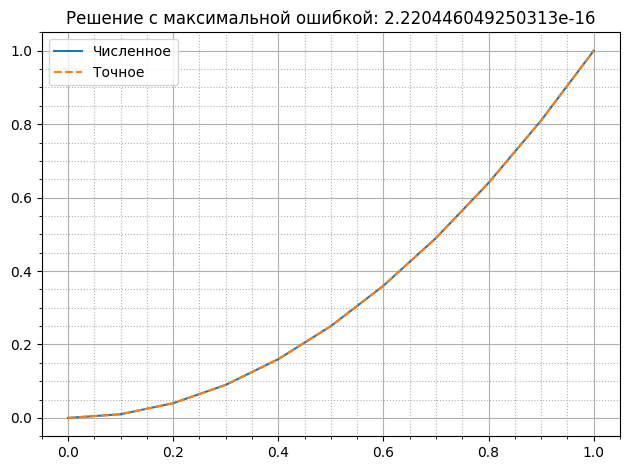

In [ ]:
y_nodes = Task1(a,b,n)
x_nodes = np.linspace(a,b,n+1)
plt.plot(x_nodes,y_nodes)
plt.plot(x_nodes,x_nodes**2,linestyle='--')
plt.title(f'Решение с максимальной ошибкой: {max(abs(Task1(a,b,n)-x_nodes**2))}')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Численное","Точное",'Узлы'])
plt.tight_layout()
plt.show()

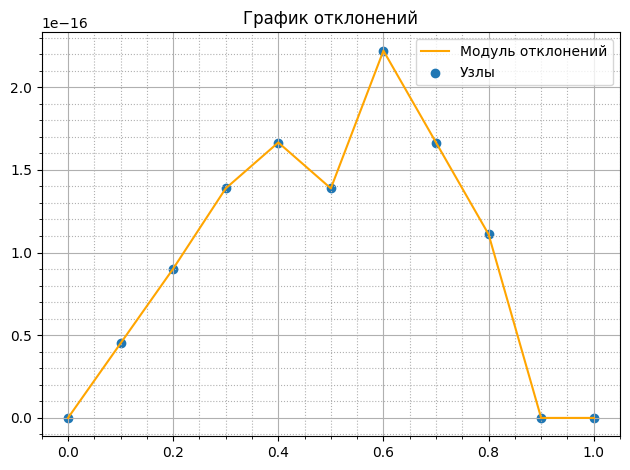

In [ ]:
plt.plot(x_nodes,abs(y_nodes-x_nodes**2),color='orange')
plt.scatter(x_nodes,abs(y_nodes-x_nodes**2))
plt.title('График отклонений')
plt.legend(["Модуль отклонений",'Узлы'])
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

#Задание 2 (Метод конечных разностей)


##Подготовка

In [ ]:
df = sp.diff(y,x,2,evaluate=False)+0.8*sp.diff(y,x,evaluate=False)-x*y-1.4 # Дифур
a,b = 1.8,2.1
n = [10,50,100]

##Функция решения

In [ ]:
def Task2(a,b,n):
    # Передаем границы интервалов и кол-во точек в сетке
    x_nodes = np.linspace(a,b,n+1)  # Сетка
    h = (b-a)/n  # Шаг сетки
    # Коэффициенты дифура
    px = sp.lambdify(x,sp.sympify(0.8),'numpy')(x_nodes[1:-1])
    qx = sp.lambdify(x,-x,'numpy')(x_nodes[1:-1])
    fx = sp.lambdify(x,sp.sympify(1.4),'numpy')(x_nodes[1:-1])
    k1,k2 = 1, 0
    l1,l2 = 2, 1
    r1,r2 = 0.5, 1.7
    # Матрица прогонки
    Ai = np.zeros(n-1) + (1/h**2-px/(2*h))
    Bi = np.zeros(n-1)+2/h**2-qx  # Так не делать.
    Ci = np.zeros(n-1) + (1/h**2+px/(2*h))
    Fi = np.zeros(n-1)+fx
    # Вычисление коэффициентов альфа, бета по формулам последовательно
    alpha = []
    alpha.append(float((-4*k2+k2*Bi[0]/Ci[0])/(2*h*k1-3*k2+k2*Ai[0]/Ci[0])))
    for i in range(1,n):
        alpha.append(float(-Ci[i-1]/(Ai[i-1]*alpha[i-1]-Bi[i-1])))
    alpha = np.array(alpha)
    beta = []
    beta.append((k2*(Fi[0]/Ci[0])+2*h*r1)/(2*h*k1-3*k2+k2*(Ai[0]/Ci[0])))
    for i in range(1,n):
        beta.append(float((Fi[i-1]-Ai[i-1]*beta[-1])/(Ai[i-1]*alpha[i-1]-Bi[i-1])))
    beta = np.array(beta)
    # Находим знаечение y в конце
    yi = [(2*h*r2+4*l2*beta[-1]-l2*alpha[-2]*beta[-1]-l2*beta[-2])/(2*h*l1+3*l2-4*l2*alpha[-1]+l2*alpha[-2]*alpha[-1])]
    # В начало добавляем новое значение y[n-i]
    for i in range(len(alpha)-1,-1,-1):
        yi.insert(0,float(alpha[i]*yi[0]+beta[i]))
    # Возвращаем полученные значения
    return yi


##Получение решения

In [ ]:
# Используя функцию получаем значения для сеток на 10, 50, 100 узлов
x_n10,y_n10 = np.linspace(a,b,n[0]+1), Task2(a,b,n[0])
x_n50,y_n50 = np.linspace(a,b,n[1]+1), Task2(a,b,n[1])
x_n100,y_n100 = np.linspace(a,b,n[2]+1), Task2(a,b,n[2])

##Сравнение разных решений в общих точках

In [ ]:
comparison = []

for i in x_n10:
    idx_n50 = np.argmin(np.abs(x_n50 - i))
    idx_n100 = np.argmin(np.abs(x_n100 - i))

    comparison.append({
        'x': i,
        'y_n10': y_n10[np.where(x_n10 == i)[0][0]],
        'y_n50': y_n50[idx_n50],
        'y_n100': y_n100[idx_n100]
    })


dataf = pd.DataFrame(comparison)
print(dataf)


       x     y_n10     y_n50    y_n100
0   1.80  0.500000  0.500000  0.500000
1   1.83  0.497846  0.497845  0.497845
2   1.86  0.497799  0.497796  0.497796
3   1.89  0.499821  0.499817  0.499817
4   1.92  0.503881  0.503876  0.503876
5   1.95  0.509949  0.509944  0.509944
6   1.98  0.518004  0.517998  0.517998
7   2.01  0.528024  0.528019  0.528018
8   2.04  0.539996  0.539990  0.539990
9   2.07  0.553908  0.553904  0.553903
10  2.10  0.569755  0.569752  0.569751


##Графики решений

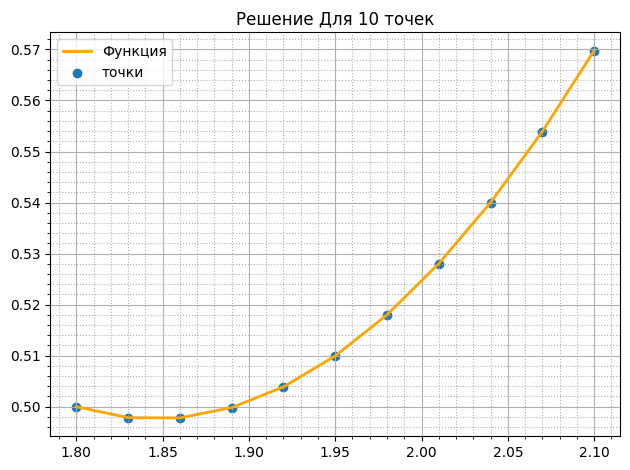

In [ ]:
plt.plot(x_n10,y_n10,color='orange',linewidth=2)
plt.scatter(x_n10,y_n10)
plt.title(f'Решение Для 10 точек')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Функция","точки"])
plt.tight_layout()
plt.show()

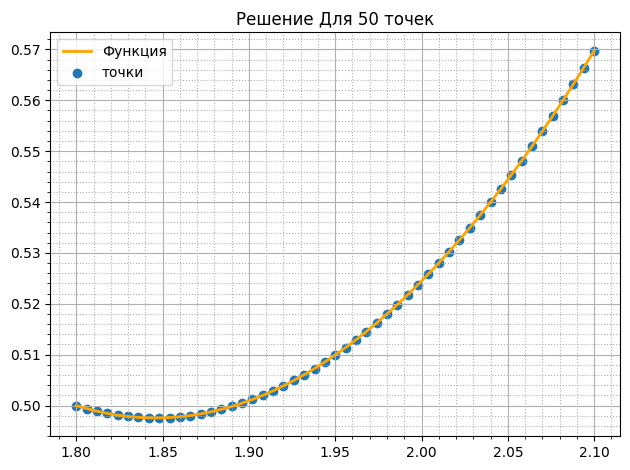

In [ ]:
plt.plot(x_n50,y_n50,color="orange",linewidth=2)
plt.scatter(x_n50,y_n50)
plt.title(f'Решение Для 50 точек')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Функция","точки"])
plt.tight_layout()
plt.show()

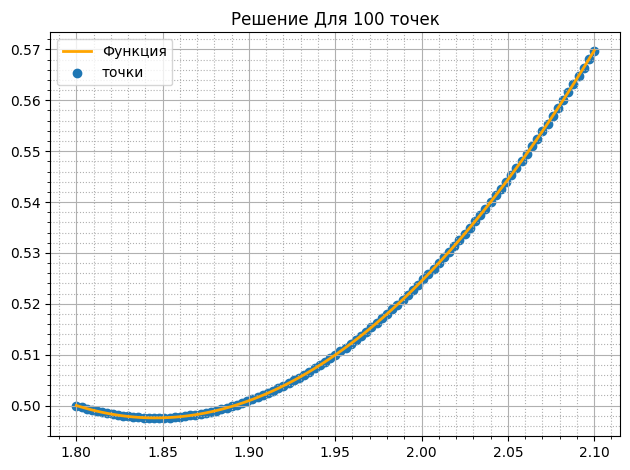

In [ ]:
plt.plot(x_n100,y_n100,color='orange',linewidth=2)
plt.scatter(x_n100,y_n100,)
plt.title(f'Решение Для 100 точек')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Функция","точки"])
plt.tight_layout()
plt.show()

##Общий график

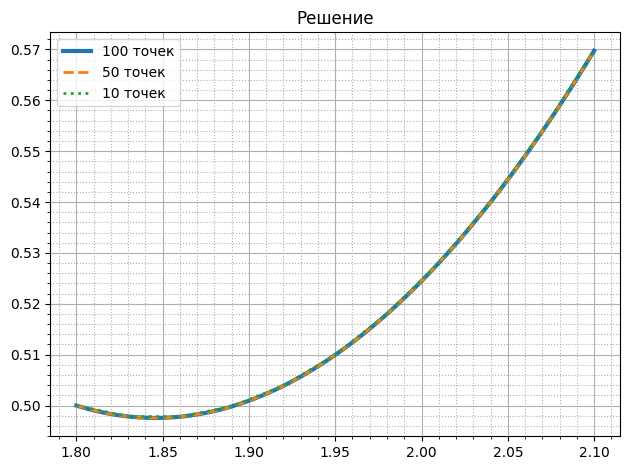

In [ ]:
plt.plot(x_n100,y_n100,linewidth=3)
plt.plot(x_n50,y_n50,linestyle='--',linewidth=2)
plt.plot(x_n10,y_n10,linestyle=':',linewidth=2)
plt.title(f'Решение')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["100 точек","50 точек", "10 точек"])
plt.tight_layout()
plt.show()

#Задание 3 (Метод Коаллокации)


In [ ]:
x = sp.symbols('x')
y = sp.Function('y')(x)

# Исходное дифференциальное уравнение
df = sp.diff(y, x, 2) + 0.8*sp.diff(y, x) - x*y - 1.4

# Границы интервала
a, b = 1.8, 2.1

# Символы для коэффициентов
c, d = sp.symbols("c d")

# Коэффициенты уравнения
px = 0.8
qx = -x
fx = 1.4

# Граничные условия
k1, k2 = 1, 0
l1, l2 = 2, 1
r1, r2 = 0.5, 1.7

# Решение для φ0 (линейная функция, удовлетворяющая граничным условиям)
p, w = sp.symbols("p w")
solution = sp.solve([
    p*k1 + (k1*a + k2)*w - r1,
    p*l1 + (l1*b + l2)*w - r2
], (p, w))

p_val = solution[p]
w_val = solution[w]

# Проверка граничных условий для φ0
phi0 = p_val + w_val*x
print("Проверка граничных условий для φ0:")
print(f"При x=a: {k1*phi0.subs(x, a) + k2*sp.diff(phi0, x).subs(x, a)} (должно быть {r1})")
print(f"При x=b: {l1*phi0.subs(x, b) + l2*sp.diff(phi0, x).subs(x, b)} (должно быть {r2})")

# Базисные функции φ1 и φ2
# Выбираем функции, которые обращают граничные условия в 0
omega1 = -(l1*(b-a)**2 + 2*l2*(b-a)) / (l1*(b-a) + l2)
omega2 = -(l1*(b-a)**2 + 3*l2*(b-a)) / (l1*(b-a) + 2*l2)

phi1 = omega1*(x-a) + (x-a)**2
phi2 = omega2*(x-a)**2 + (x-a)**3

print("\nПроверка граничных условий для базисных функций:")
print(f"φ1: при x=a: {k1*phi1.subs(x, a) + k2*sp.diff(phi1, x).subs(x, a)} (должно быть 0)")
print(f"φ1: при x=b: {l1*phi1.subs(x, b) + l2*sp.diff(phi1, x).subs(x, b)} (должно быть 0)")
print(f"φ2: при x=a: {k1*phi2.subs(x, a) + k2*sp.diff(phi2, x).subs(x, a)} (должно быть 0)")
print(f"φ2: при x=b: {l1*phi2.subs(x, b) + l2*sp.diff(phi2, x).subs(x, b)} (должно быть 0)")

# Приближенное решение
y_approx = phi0 + c*phi1 + d*phi2

# Точки коллокации (n=2)
x1 = a + (b-a)/3
x2 = a + 2*(b-a)/3

# Подставляем приближенное решение в уравнение в точках коллокации
eq1 = sp.diff(y_approx, x, 2).subs(x, x1) + 0.8*sp.diff(y_approx, x).subs(x, x1) - x1*y_approx.subs(x, x1) - 1.4
eq2 = sp.diff(y_approx, x, 2).subs(x, x2) + 0.8*sp.diff(y_approx, x).subs(x, x2) - x2*y_approx.subs(x, x2) - 1.4

# Решаем систему для коэффициентов c и d
coeff_solution = sp.solve([eq1, eq2], (c, d))
c_val = coeff_solution[c]
d_val = coeff_solution[d]

# Финальное приближенное решение
y_final = y_approx.subs({c: c_val, d: d_val})

print("\nПриближенное решение:")
print(y_final)

# Преобразуем в численную функцию для вычислений
y_num = sp.lambdify(x, y_final, 'numpy')

Проверка граничных условий для φ0:
При x=a: 0.500000000000000 (должно быть 0.5)
При x=b: 1.70000000000000 (должно быть 1.7)

Проверка граничных условий для базисных функций:
φ1: при x=a: 0 (должно быть 0)
φ1: при x=b: 6.66133814775094E-16 (должно быть 0)
φ2: при x=a: 0 (должно быть 0)
φ2: при x=b: -1.11022302462516E-16 (должно быть 0)

Приближенное решение:
-0.103959080392016*x - 0.773366987972749*(0.555555555555556*x - 1)**3 + 3.77708965459911*(0.555555555555556*x - 1)**2 + 0.687126344705629


##Графики

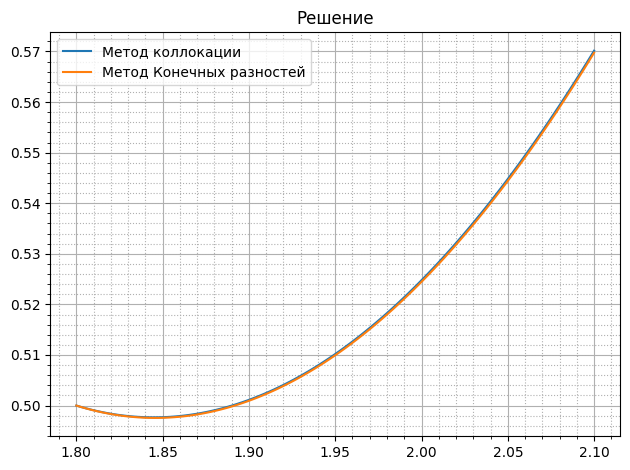

In [ ]:
plt.plot(np.linspace(a,b,101),y_num(np.linspace(a,b,101)))
plt.plot(x_n100,y_n100)
plt.title(f'Решение')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Метод коллокации","Метод Конечных разностей"])
plt.tight_layout()
plt.show()

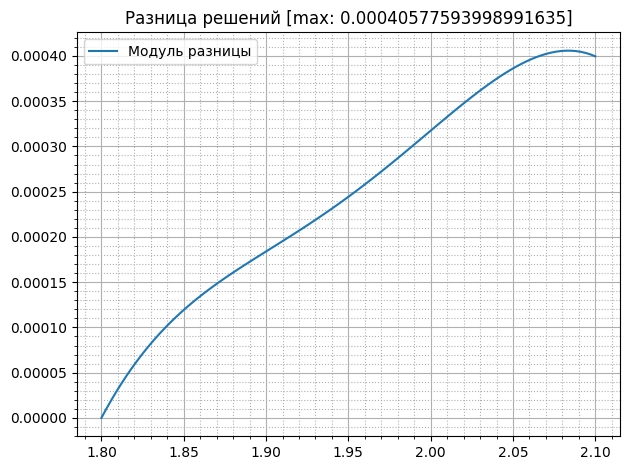

In [ ]:
plt.plot(np.linspace(a,b,101),abs(y_num(np.linspace(a,b,101))-y_n100))
plt.title(f'Разница решений [max: {max(abs(y_num(np.linspace(a,b,101))-y_n100))}]')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Модуль разницы"])
plt.tight_layout()
plt.show()

##Невязка


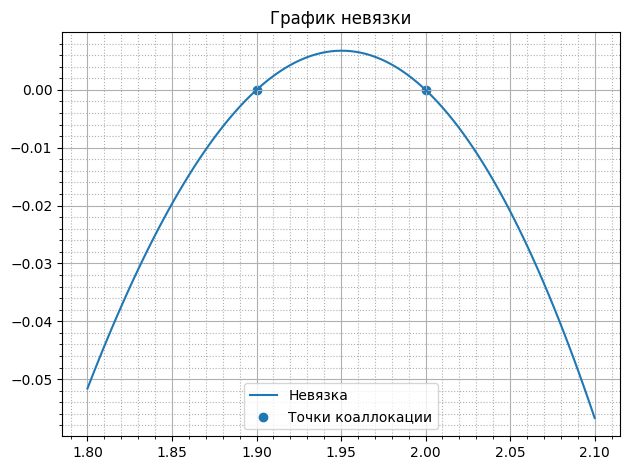

In [ ]:
aboba = sp.lambdify(x,(y_final.diff(x,2)+0.8*y_final.diff(x,1)-x*y_final-1.4),'numpy')
plt.plot(np.linspace(a,b,101),aboba(np.linspace(a,b,101)))
plt.scatter([x1,x2],aboba(np.array([x1,x2])))
plt.title(f'График невязки')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(["Невязка","Точки коаллокации"])
plt.tight_layout()
plt.show()